In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# reading data from csv and creating a dataframe
df = pd.read_csv('Google-Playstore.csv')

# dataframe dimensions
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 603047 rows and 23 columns.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603047 entries, 0 to 603046
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           603046 non-null  object 
 1   App Id             603047 non-null  object 
 2   Category           603047 non-null  object 
 3   Rating             599287 non-null  float64
 4   Rating Count       599287 non-null  float64
 5   Installs           602875 non-null  object 
 6   Minimum Installs   602875 non-null  float64
 7   Maximum Installs   603047 non-null  int64  
 8   Free               603047 non-null  bool   
 9   Price              603047 non-null  float64
 10  Currency           602866 non-null  object 
 11  Size               603047 non-null  object 
 12  Minimum Android    602556 non-null  object 
 13  Developer Id       603045 non-null  object 
 14  Developer Website  423783 non-null  object 
 15  Developer Email    603010 non-null  object 
 16  Re

In [4]:
#Drop unnecessary variables: Deveopler Website, Developer Id, Developer Email, Privacy Policy
df = df.drop(['App Name','App Id','Minimum Installs','Maximum Installs','Minimum Android','Last Updated','Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy','Content Rating','Privacy Policy','Ad Supported','In App Purchases','Editors Choice'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603047 entries, 0 to 603046
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Category      603047 non-null  object 
 1   Rating        599287 non-null  float64
 2   Rating Count  599287 non-null  float64
 3   Installs      602875 non-null  object 
 4   Free          603047 non-null  bool   
 5   Price         603047 non-null  float64
 6   Currency      602866 non-null  object 
 7   Size          603047 non-null  object 
 8   Released      570769 non-null  object 
dtypes: bool(1), float64(3), object(5)
memory usage: 37.4+ MB


In [6]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df.Installs = pd.to_numeric(df.Installs,errors='coerce')
df.Installs=df.Installs.apply(func=np.log1p)

In [7]:
# remove apps other than US
df = df[df['Currency'] == 'USD']
df = df.drop(['Currency'],axis=1)

In [8]:
#Remove Varies with Device from Size
df = df[df['Size'] != 'Varies with device']
kb_index = df.Size[df.Size.str.contains('k')].index
mb_index = df.Size[(df.Size.str.contains('M'))].index
#Remove M,k,, from the size variable
#df['Size'] = df['Size'].str.replace('.','')
df['Size'] = df['Size'].str.replace(',','')
df.Size = df.Size.str.replace('M','')
df.Size = df.Size.str.replace('k','')
df.Size = pd.to_numeric(df.Size,errors='coerce')
df.Size.loc[mb_index] = df.Size.loc[mb_index] * 1000

In [9]:
df.Released=pd.to_datetime(df.Released)
df['ReleaseMonth']= df['Released'].dt.month
df = df.dropna(subset=['ReleaseMonth'])

In [10]:
df = df[(df.Rating>=1) & (df.Rating<=5)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399284 entries, 0 to 603046
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Category      399284 non-null  object        
 1   Rating        399284 non-null  float64       
 2   Rating Count  399284 non-null  float64       
 3   Installs      399284 non-null  float64       
 4   Free          399284 non-null  bool          
 5   Price         399284 non-null  float64       
 6   Size          399284 non-null  float64       
 7   Released      399284 non-null  datetime64[ns]
 8   ReleaseMonth  399284 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), object(1)
memory usage: 27.8+ MB


In [12]:
df.corr(method='pearson')

,Rating,Rating Count,Installs,Free,Price,Size,ReleaseMonth
Rating,1.000000,0.008558,-0.104128,-0.025308,0.007313,-0.016761,-0.005984
Rating Count,0.008558,1.000000,0.094983,0.005942,-0.002085,0.048935,0.003805
Installs,-0.104128,0.094983,1.000000,0.196606,-0.076338,0.183322,0.009794
Free,-0.025308,0.005942,0.196606,1.000000,-0.347241,-0.028584,-0.000838
Price,0.007313,-0.002085,-0.076338,-0.347241,1.000000,0.019024,0.000170
Size,-0.016761,0.048935,0.183322,-0.028584,0.019024,1.000000,0.005345
ReleaseMonth,-0.005984,0.003805,0.009794,-0.000838,0.000170,0.005345,1.000000


In [13]:
df=pd.get_dummies(df,columns=['Category','Free'],dtype=np.int64)


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd044488850>


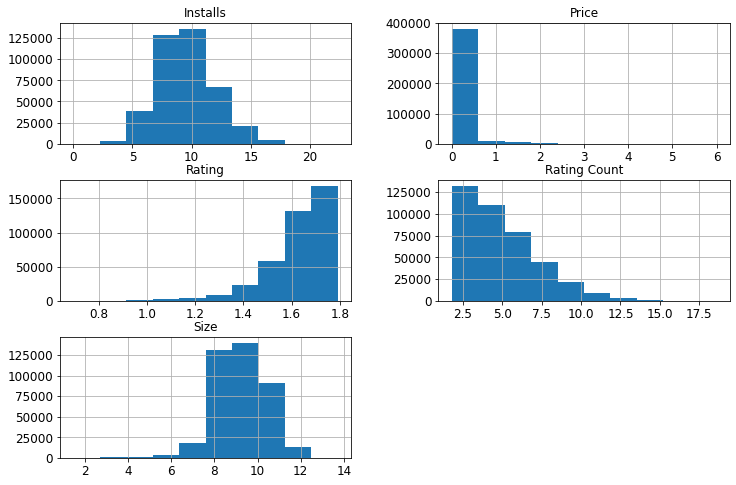

In [25]:
print(df.hist(['Rating','Rating Count','Size','Installs','Price'],figsize=(12,8),xlabelsize=12,ylabelsize=12))

In [24]:
df.Price=df.Price.apply(func=np.log1p)
df.Rating=df.Rating.apply(func=np.log1p)
df['Rating Count']=df['Rating Count'].apply(func=np.log1p)
df.Size=df.Size.apply(func=np.log1p)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399284 entries, 0 to 603046
Data columns (total 57 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Rating                            399284 non-null  float64       
 1   Rating Count                      399284 non-null  float64       
 2   Installs                          399284 non-null  float64       
 3   Price                             399284 non-null  float64       
 4   Size                              399284 non-null  float64       
 5   Released                          399284 non-null  datetime64[ns]
 6   ReleaseMonth                      399284 non-null  float64       
 7   Category_Action                   399284 non-null  int64         
 8   Category_Adventure                399284 non-null  int64         
 9   Category_Arcade                   399284 non-null  int64         
 10  Category_Art & Design           

In [15]:
print(df.columns)

Index(['Rating', 'Rating Count', 'Installs', 'Price', 'Size', 'Released',
       'ReleaseMonth', 'Category_Action', 'Category_Adventure',
       'Category_Arcade', 'Category_Art & Design', 'Category_Auto & Vehicles',
       'Category_Beauty', 'Category_Board', 'Category_Books & Reference',
       'Category_Business', 'Category_Card', 'Category_Casino',
       'Category_Casual', 'Category_Comics', 'Category_Communication',
       'Category_Dating', 'Category_Education', 'Category_Educational',
       'Category_Entertainment', 'Category_Events', 'Category_Finance',
       'Category_Food & Drink', 'Category_Health & Fitness',
       'Category_House & Home', 'Category_Libraries & Demo',
       'Category_Lifestyle', 'Category_Maps & Navigation', 'Category_Medical',
       'Category_Music', 'Category_Music & Audio', 'Category_News & Magazines',
       'Category_Parenting', 'Category_Personalization',
       'Category_Photography', 'Category_Productivity', 'Category_Puzzle',
       'Category_

In [26]:
X = df.drop(['Installs','Released'],axis=1)

In [27]:
y = df['Installs']

In [28]:
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 3.558e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:31:57   Log-Likelihood:            -5.8297e+05
No. Observations:              399284   AIC:                         1.166e+06
Df Residuals:                  399230   BIC:                         1.167e+06
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Rating  

In [29]:
#After first iteration
tobedropped = ['Installs','Released','Category_Sports','Category_Social','Category_Shopping','Category_Productivity','Category_Lifestyle','Category_Communication']

In [22]:
X = df.drop(tobedropped,axis=1)
y= y = df['Installs']
model = sm.OLS(y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     1330.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:24:43   Log-Likelihood:            -9.0166e+05
No. Observations:              399284   AIC:                         1.803e+06
Df Residuals:                  399235   BIC:                         1.804e+06
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Rating  